In [140]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [141]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit1():
    qml.CNOT(wires=[0,1])
    qml.CZ(wires=[0,2])
    qml.SWAP(wires=[1,2])
    qml.ControlledPhaseShift(np.pi/4,wires=[2,0])
    return qml.state()

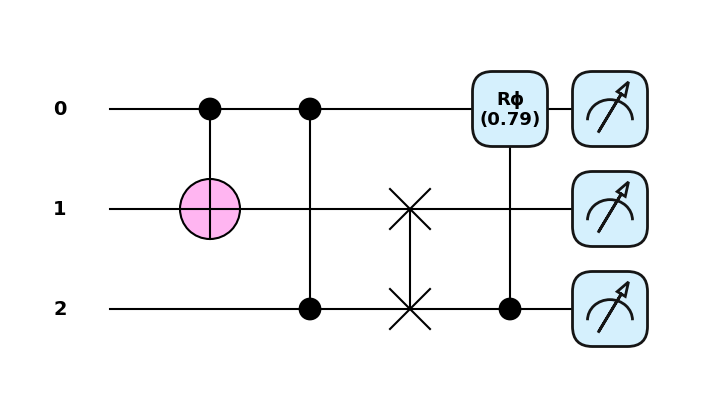

In [142]:
qml.draw_mpl(circuit1, decimals = 2, style = "pennylane")()
plt.show()

In [143]:
@qml.qnode(dev)
def circuit2():
    qml.ctrl(qml.RX, (1,2), control_values=(1,1))(np.pi/4, wires=0)
    qml.ctrl(qml.Hadamard, (0,1), control_values=(1,1))(wires=2)
    qml.ctrl(qml.PauliZ, (0,1), control_values=(1,0))(wires=2)
    return qml.state()

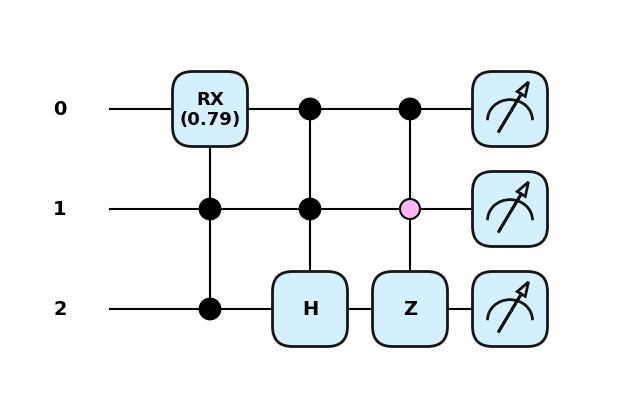

In [144]:
qml.draw_mpl(circuit2, decimals = 2, style = "pennylane")()
plt.show()

In [145]:
@qml.qnode(dev)
def circuit3():
    qml.ControlledSequence(qml.RX(np.pi/2, wires=2), control = [0,1])
    qml.ControlledSequence(qml.RY(np.pi/2, wires=0), control = [1,2])
    return qml.state()

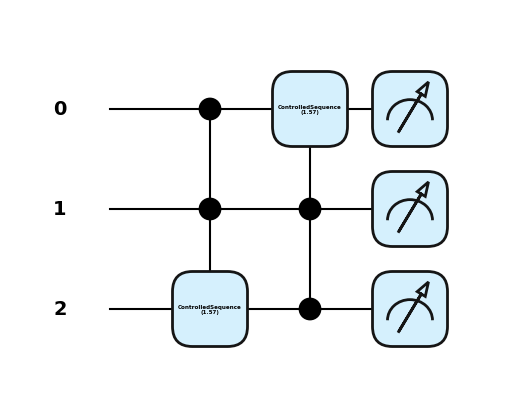

In [146]:
qml.draw_mpl(circuit3, decimals = 2, style = "pennylane")()
plt.show()